In [7]:
import pandas as pd
import numpy as np
import monai


In [8]:
from monai.transforms import (
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    ScaleIntensityd, 
    RandGaussianNoised,
    RandRotate90d,
    RandGibbsNoised,
    RandKSpaceSpikeNoised,
    RandBiasFieldd,
    SaveImaged
)
from monai.data import Dataset, DataLoader
import matplotlib.pyplot as plt

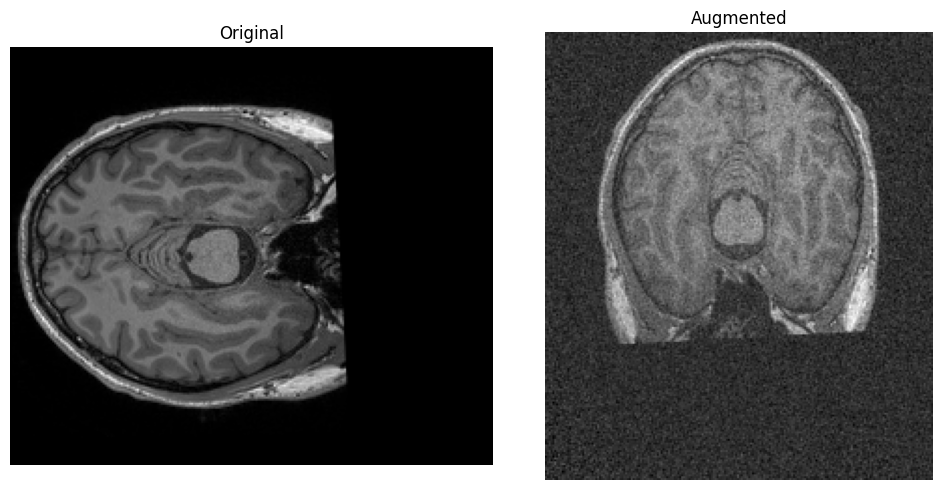

In [9]:


def monai_augmentation_demo():
    # Specify the path to your NIfTI file
    # Example path from OpenNeuro dataset (you'll need to modify this)
    image_path = "sub-01_T1w.nii.gz"

    # Create a data dictionary
    data = [
        {"image": image_path}
    ]

    # Define transforms
    transforms = Compose([
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        ScaleIntensityd(keys=["image"]),

        # Add random Gaussian noise
        RandGaussianNoised(
            keys=["image"],
            prob=1.0,
            mean=0.0,
            std=0.1
        ),

        # Add Gibbs noise (ringing artifacts)
        RandGibbsNoised(
            keys=["image"],
            prob=1.0,
            alpha=(0.0, 0.5)
        ),

        # Add k-space spike noise
        RandKSpaceSpikeNoised(
            keys=["image"],
            prob=1.0,
            intensity_range=(0.1, 0.5)
        ),

        # Add bias field
        RandBiasFieldd(
            keys=["image"],
            prob=1.0,
            degree=3
        ),

        # Random 90 degree rotation
        RandRotate90d(
            keys=["image"],
            prob=1.0,
            max_k=3
        )
    ])

    # Create dataset and dataloader
    dataset = Dataset(data=data, transform=transforms)
    dataloader = DataLoader(dataset, batch_size=1)

    # Get one sample
    batch = next(iter(dataloader))

    # Load original image for comparison
    original_transforms = Compose([
        LoadImaged(keys=["image"]),
        EnsureChannelFirstd(keys=["image"]),
        ScaleIntensityd(keys=["image"])
    ])
    original_dataset = Dataset(data=data, transform=original_transforms)
    original_batch = next(iter(DataLoader(original_dataset, batch_size=1)))

    # Visualize results
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Original image - middle slice
    original_data = original_batch["image"][0, 0, :, :, original_batch["image"].shape[-1]//2]
    axes[0].imshow(original_data, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

    # Augmented image - middle slice
    augmented_data = batch["image"][0, 0, :, :, batch["image"].shape[-1]//2]
    axes[1].imshow(augmented_data, cmap='gray')
    axes[1].set_title('Augmented')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    monai_augmentation_demo()

# Created/Modified files during execution:
# None (only displays the images)